1 . Import Libraries

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy

2 . Load Dataset

In [208]:
df = pd.read_csv("../data/Linear Regression.csv", delimiter = ",", header = 0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [209]:
df.shape

(1338, 7)

3 . Checking Null Values

In [210]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [211]:
df1 = df
for i in range(len(df1.columns)):   
    print(df1.columns[i])
    

age
sex
bmi
children
smoker
region
charges


# Preprocessing

In [212]:
df1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [213]:
df1.sex.unique()

array(['female', 'male'], dtype=object)

In [214]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [215]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [216]:
df2 = df1.drop("charges", axis = 1)
df2

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [217]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transform = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X = np.array(transform.fit_transform(df2))

In [218]:
Y = df1.iloc[:,-1]
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [225]:
X

array([[ 1.  ,  0.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 33.77,  1.  ],
       [ 0.  ,  1.  ,  1.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 61.  , 29.07,  0.  ]])

In [220]:
X.shape

(1338, 11)

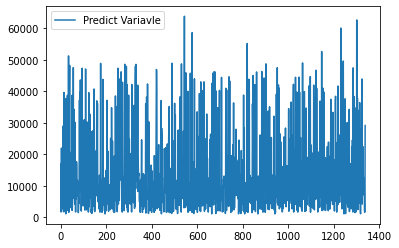

In [223]:
fig = plt.figure() 

# fig.set_size_inches(25, 10)
plt.plot(Y, linestyle='-', label = f"Predict Variavle")
plt.legend(loc='best')
plt.show()

In [227]:
from sklearn.linear_model import LinearRegression

linear_model1 = LinearRegression()
linear_model1.fit(X,Y)

LinearRegression()

In [228]:
print("Accuracy on training set:", linear_model1.score(X,Y))

Accuracy on training set: 0.7509130345985207
